# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()


### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(PReLU())
#act = PReLU(weights=None, alpha_initializer="zero")
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 128, 128, 32)      524288    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 64, 64, 128)       524288    
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch38.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
182/182 [==============================] - 66s 362ms/step - loss: 5.5329 - acc: 0.0070 - val_loss: 5.6429 - val_acc: 0.0111

Epoch 00001: val_loss improved from inf to 5.64288, saving model to Saved_Models/weights.best.from_scratch38.hdf5
Epoch 2/200
182/182 [==============================] - 57s 316ms/step - loss: 5.2652 - acc: 0.0155 - val_loss: 5.6018 - val_acc: 0.0158

Epoch 00002: val_loss improved from 5.64288 to 5.60185, saving model to Saved_Models/weights.best.from_scratch38.hdf5
Epoch 3/200
182/182 [==============================] - 59s 326ms/step - loss: 5.1670 - acc: 0.0213 - val_loss: 5.7727 - val_acc: 0.0145

Epoch 00003: val_loss did not improve from 5.60185
Epoch 4/200
182/182 [==============================] - 60s 329ms/step - loss: 5.0730 - acc: 0.0254 - val_loss: 5.1919 - val_acc: 0.0200

Epoch 00004: val_loss improved from 5.60185 to 5.19188, saving model to Saved_Models/weights.best.from_scratch38.hdf5
Epo

182/182 [==============================] - 57s 311ms/step - loss: 3.5851 - acc: 0.1983 - val_loss: 4.6126 - val_acc: 0.0971

Epoch 00038: val_loss did not improve from 4.33345
Epoch 39/200
182/182 [==============================] - 56s 310ms/step - loss: 3.5397 - acc: 0.1892 - val_loss: 5.5302 - val_acc: 0.0669

Epoch 00039: val_loss did not improve from 4.33345
Epoch 40/200
182/182 [==============================] - 56s 309ms/step - loss: 3.4987 - acc: 0.2085 - val_loss: 6.6068 - val_acc: 0.0302

Epoch 00040: val_loss did not improve from 4.33345
Epoch 41/200
182/182 [==============================] - 56s 310ms/step - loss: 3.4854 - acc: 0.2145 - val_loss: 5.2712 - val_acc: 0.0596

Epoch 00041: val_loss did not improve from 4.33345
Epoch 42/200
182/182 [==============================] - 57s 311ms/step - loss: 3.4192 - acc: 0.2189 - val_loss: 4.8460 - val_acc: 0.0882

Epoch 00042: val_loss did not improve from 4.33345
Epoch 43/200
182/182 [==============================] - 56s 309ms/st

182/182 [==============================] - 57s 311ms/step - loss: 2.4462 - acc: 0.3990 - val_loss: 4.0509 - val_acc: 0.1388

Epoch 00080: val_loss did not improve from 3.76557
Epoch 81/200
182/182 [==============================] - 57s 313ms/step - loss: 2.4482 - acc: 0.3966 - val_loss: 4.2242 - val_acc: 0.1469

Epoch 00081: val_loss did not improve from 3.76557
Epoch 82/200
182/182 [==============================] - 57s 311ms/step - loss: 2.4132 - acc: 0.4016 - val_loss: 5.3547 - val_acc: 0.1112

Epoch 00082: val_loss did not improve from 3.76557
Epoch 83/200
182/182 [==============================] - 57s 312ms/step - loss: 2.4083 - acc: 0.3941 - val_loss: 3.8371 - val_acc: 0.1891

Epoch 00083: val_loss did not improve from 3.76557
Epoch 84/200
182/182 [==============================] - 57s 314ms/step - loss: 2.3967 - acc: 0.3956 - val_loss: 3.9851 - val_acc: 0.1699

Epoch 00084: val_loss did not improve from 3.76557
Epoch 85/200
182/182 [==============================] - 57s 314ms/st


Epoch 00122: val_loss did not improve from 3.63410
Epoch 123/200
182/182 [==============================] - 57s 314ms/step - loss: 1.8384 - acc: 0.5173 - val_loss: 4.0453 - val_acc: 0.1917

Epoch 00123: val_loss did not improve from 3.63410
Epoch 124/200
182/182 [==============================] - 57s 315ms/step - loss: 1.8238 - acc: 0.5151 - val_loss: 3.5474 - val_acc: 0.2423

Epoch 00124: val_loss improved from 3.63410 to 3.54737, saving model to Saved_Models/weights.best.from_scratch38.hdf5
Epoch 125/200
182/182 [==============================] - 58s 320ms/step - loss: 1.8234 - acc: 0.5112 - val_loss: 3.7163 - val_acc: 0.2147

Epoch 00125: val_loss did not improve from 3.54737
Epoch 126/200
182/182 [==============================] - 57s 315ms/step - loss: 1.7621 - acc: 0.5373 - val_loss: 4.1817 - val_acc: 0.1563

Epoch 00126: val_loss did not improve from 3.54737
Epoch 127/200
182/182 [==============================] - 57s 315ms/step - loss: 1.7747 - acc: 0.5321 - val_loss: 5.5279 -

182/182 [==============================] - 57s 315ms/step - loss: 1.4412 - acc: 0.5963 - val_loss: 4.2100 - val_acc: 0.1814

Epoch 00165: val_loss did not improve from 3.54737
Epoch 166/200
182/182 [==============================] - 59s 325ms/step - loss: 1.4618 - acc: 0.6051 - val_loss: 4.0502 - val_acc: 0.1891

Epoch 00166: val_loss did not improve from 3.54737
Epoch 167/200
182/182 [==============================] - 59s 327ms/step - loss: 1.4551 - acc: 0.5968 - val_loss: 4.3339 - val_acc: 0.1444

Epoch 00167: val_loss did not improve from 3.54737
Epoch 168/200
182/182 [==============================] - 59s 325ms/step - loss: 1.4361 - acc: 0.6104 - val_loss: 3.7426 - val_acc: 0.2325

Epoch 00168: val_loss did not improve from 3.54737
Epoch 169/200
182/182 [==============================] - 59s 324ms/step - loss: 1.4587 - acc: 0.5982 - val_loss: 3.9996 - val_acc: 0.1997

Epoch 00169: val_loss did not improve from 3.54737
Epoch 170/200
182/182 [==============================] - 58s 318

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,5.642884,0.011073,5.531039,0.007074
1,1.0,5.601846,0.015758,5.264472,0.015528
2,2.0,5.772745,0.014480,5.160293,0.021394
3,3.0,5.191881,0.020017,5.072292,0.025535
4,4.0,6.636958,0.008944,4.991173,0.031746
5,5.0,5.820061,0.013203,4.935156,0.035887
6,6.0,5.663174,0.013203,4.881112,0.037785
7,7.0,5.395635,0.021721,4.819613,0.042098
8,8.0,4.983274,0.025554,4.761473,0.048482
9,9.0,4.911386,0.045145,4.706165,0.051932


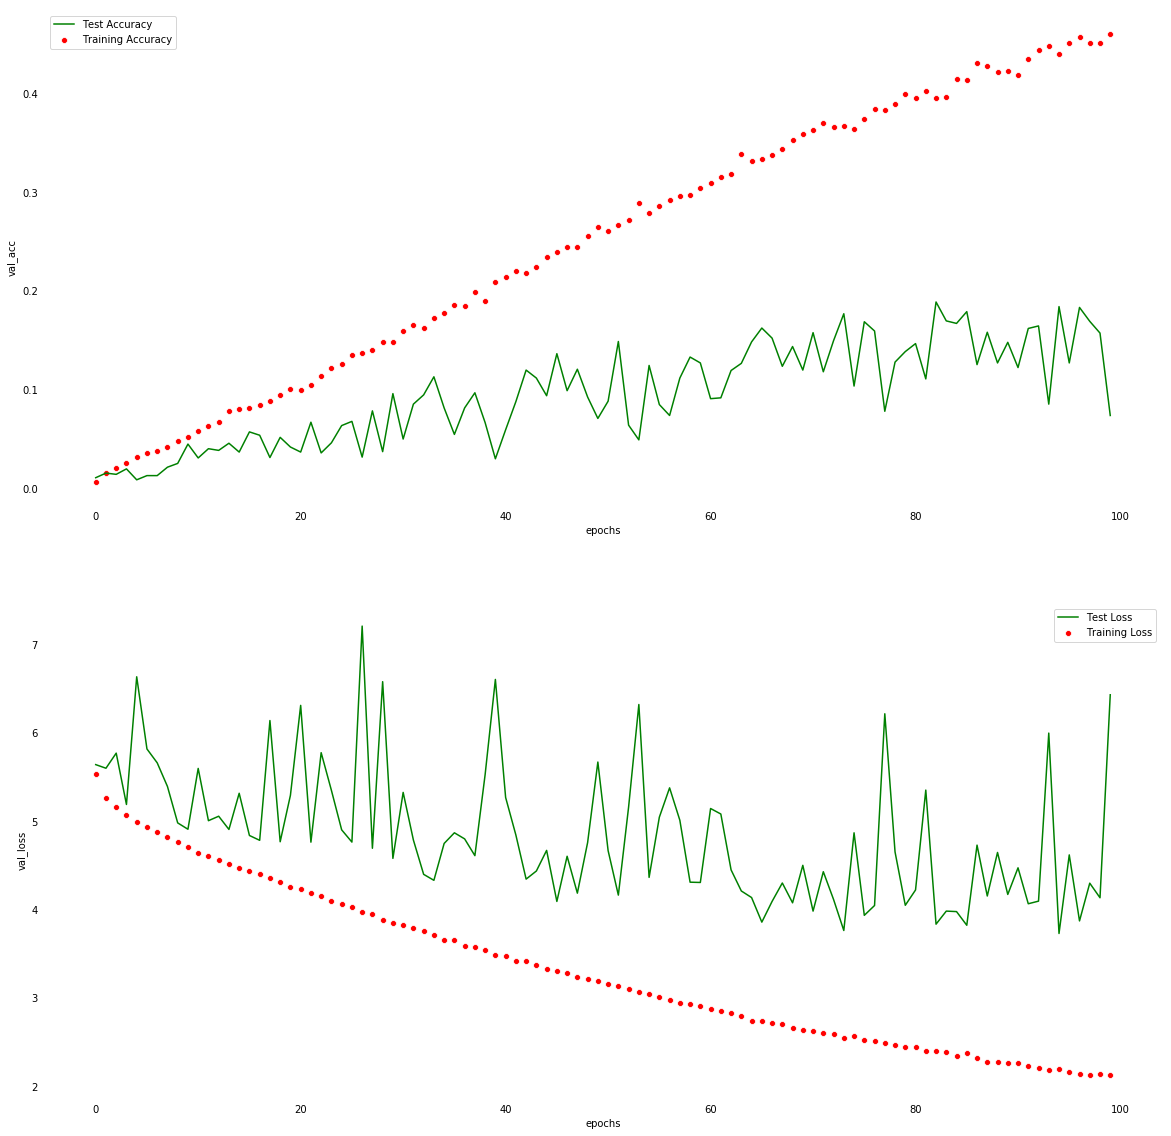

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters